In [205]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import *

In [206]:
# Parameters of the Gaussian distribution
mu_x = 0.0  # Mean in the x-direction
mu_y = 0.0  # Mean in the y-direction
sigma_x = 1.0  # Standard deviation in the x-direction
sigma_y = 3.0  # Standard deviation in the y-direction
size = 14      # Size of the grid in display
mesh_size = 1000  # Size of the meshgrid
no_of_eggs = 1e4
steps = 200

# Create a grid of x and y values
x = np.linspace(-size/2, size/2, mesh_size)  
y = np.linspace(size/2, -size/2, mesh_size)  

x, y = np.meshgrid(x, y)
dx = x[0][1] - x[0][0]
dy = y[0][0] - y[1][0]

# print(x)
# print(y)

In [207]:
# Setting up initial egg distribution

eggs_dist = np.exp(-((x - mu_x)**2 / (2 * sigma_x**2) + (y - mu_y)**2 / (2 * sigma_y**2)))
eggs_dist /= (2 * np.pi * sigma_x * sigma_y)  # Normalize to make the total probability sum to 1

eggs_dist = eggs_dist*no_of_eggs              

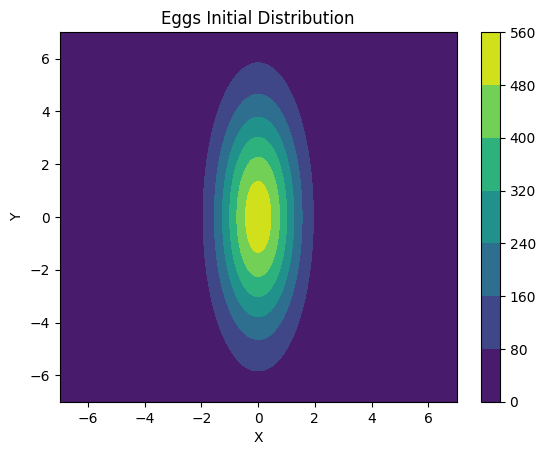

In [208]:
# Plot the initial Gaussian egg distribution
plt.contourf(x, y, eggs_dist, cmap='viridis')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Eggs Initial Distribution')
plt.colorbar()
plt.show()

In [209]:
np.sum(eggs_dist)*dx*dy - no_of_eggs

-195.08388473912964

In [210]:
# arr = np.array([[1, 2, 3, 4, 5],
#                 [6, 7, 8, 9, 10],
#                 [11, 12, 13, 14, 15],
#                 [16, 17, 18, 19, 20],
#                 [21, 22, 23, 24, 25]])

# gradient_y = -np.gradient(arr, axis=0)/dy  # Gradient along axis 0 (columns)
# gradient_x = np.gradient(arr, axis=1)/dx  # Gradient along axis 1 (rows)

gradient_y = -np.gradient(eggs_dist, axis=0)/dy  # Gradient along axis 0 (columns)
gradient_x = np.gradient(eggs_dist, axis=1)/dx  # Gradient along axis 1 (rows)

gradient_gradient_y = -np.gradient(gradient_y, axis=0)/dy  # Gradient along axis 0 (columns)
gradient_gradient_x = np.gradient(gradient_x, axis=1)/dx  # Gradient along axis 1 (rows)

In [211]:
#region Plot gradients

# plt.figure(figsize=(16, 6))
# plt.subplot(1, 3, 1)
# plt.imshow(gradient_y, cmap='viridis', extent=(-size / 2, size / 2, -size / 2, size / 2))
# plt.colorbar()
# # plt.plot(np.linspace(-size/2, size/2, 1000), gradient_y)
# plt.title('Gradient along y')
# plt.subplot(1, 3, 2)
# plt.imshow(gradient_x, cmap='viridis', extent=(-size / 2, size / 2, -size / 2, size / 2))
# plt.title('Gradient along x')
# plt.colorbar()

# plt.subplot(1, 3, 3)
# plt.imshow(gradient_x**2 + gradient_y**2, cmap='viridis', extent=(-size / 2, size / 2, -size / 2, size / 2))
# plt.title('Gradient magnitude')
# plt.colorbar()

#endregion

In [212]:
def skewed_normal_pdf(x, alpha, mean2, sigma2, scaling_factor=1.0):
    standard_normal_pdf = (1 / (sigma2 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean2) / sigma2)**2)
    cdf_term = norm.cdf(alpha * (x - mean2))
    return 2 * scaling_factor * standard_normal_pdf * cdf_term / sigma2

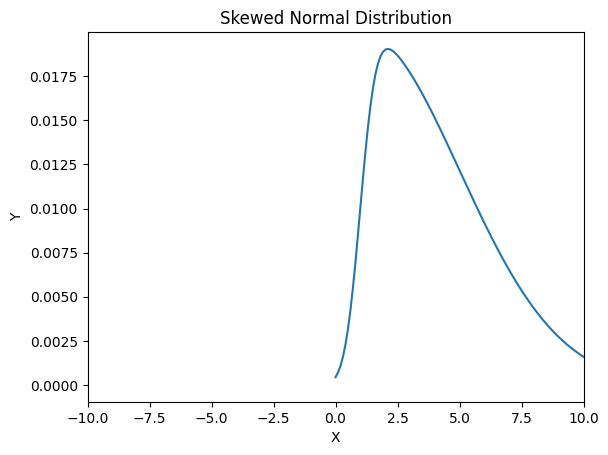

In [219]:
egg_release_factors = skewed_normal_pdf(np.linspace(0,20, steps), alpha=2, mean2=1, sigma2=4)
egg_release_factors /= np.sum(egg_release_factors)

plt.plot(np.linspace(0,20, steps), egg_release_factors)
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(-10, 10)
plt.title('Skewed Normal Distribution')

def perform_step(steps, k, alpha, mean2, sigma2, dx, dy, no_of_eggs, eggs_dist):
    population = np.zeros((mesh_size, mesh_size))
    dt = 1/steps
    egg_release_factors = skewed_normal_pdf(np.linspace(0,20, steps), alpha=alpha, mean2=mean2, sigma2=sigma2)
    egg_release_factors /= np.sum(egg_release_factors)
    
    for t in range(0, steps):
        gradient_y = -np.gradient(population, axis=0)/dy  # Gradient along axis 0 (columns)
        gradient_x = np.gradient(population, axis=1)/dx  # Gradient along axis 1 (rows)
        temp1 = np.multiply(gradient_y, population)
        temp2 = np.multiply(gradient_x, population)
        
        gradient_gradient_y = -np.gradient(temp1, axis=0)/dy  # Gradient of gradient along axis 0 (columns)
        gradient_gradient_x = np.gradient(temp2, axis=1)/dx  # Gradient of gradient along axis 1 (rows)
    
        population += k*(gradient_gradient_x + gradient_gradient_y)*dt + egg_release_factors[t]*eggs_dist
        
        if(t != 0 and t%10 == 0):
            plt.imshow(population, cmap='viridis', vmin=0, vmax=no_of_eggs/200, extent=(-size / 2, size / 2, -size / 2, size / 2))
            plt.colorbar()
            plt.title('Population')
            plt.grid()
            plt.show()
            
    return population

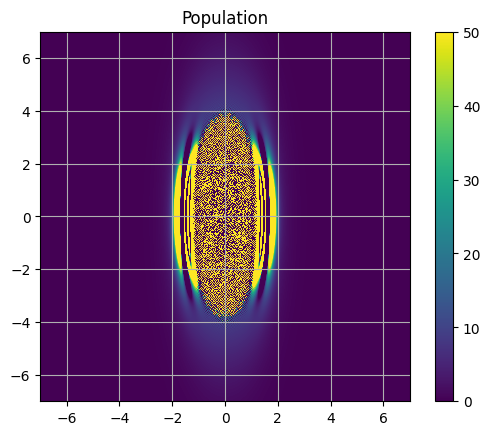

C:\Users\Sujal\AppData\Local\Temp\ipykernel_9424\3762356205.py:19: RuntimeWarning: overflow encountered in square
  temp1 = np.multiply(gradient_y, population**2)
C:\Users\Sujal\AppData\Local\Temp\ipykernel_9424\3762356205.py:19: RuntimeWarning: overflow encountered in multiply
  temp1 = np.multiply(gradient_y, population**2)
C:\Users\Sujal\AppData\Local\Temp\ipykernel_9424\3762356205.py:20: RuntimeWarning: overflow encountered in square
  temp2 = np.multiply(gradient_x, population**2)
C:\Users\Sujal\AppData\Local\Temp\ipykernel_9424\3762356205.py:20: RuntimeWarning: overflow encountered in multiply
  temp2 = np.multiply(gradient_x, population**2)
C:\Users\Sujal\AppData\Local\Temp\ipykernel_9424\3762356205.py:22: RuntimeWarning: overflow encountered in divide
  gradient_gradient_y = -np.gradient(temp1, axis=0)/dy  # Gradient of gradient along axis 0 (columns)
C:\Users\Sujal\AppData\Local\Temp\ipykernel_9424\3762356205.py:23: RuntimeWarning: overflow encountered in divide
  gradient_gra

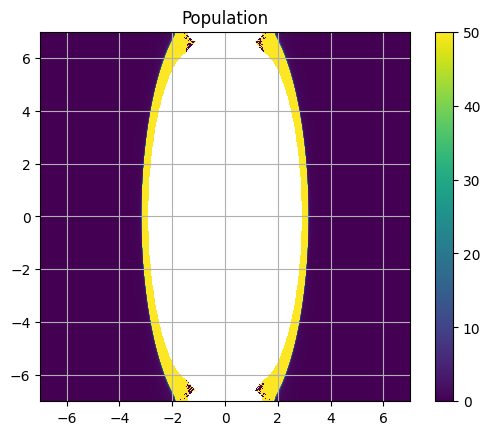

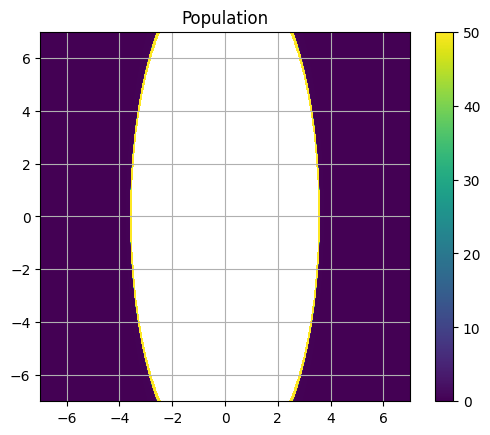

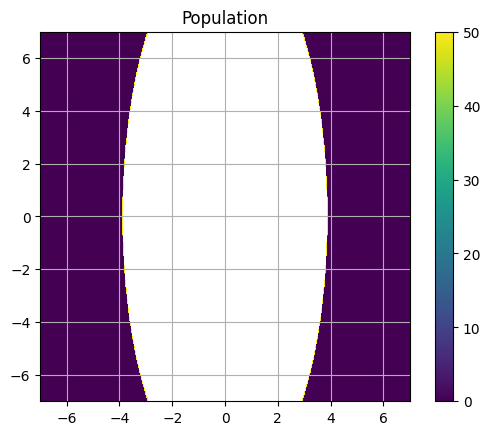

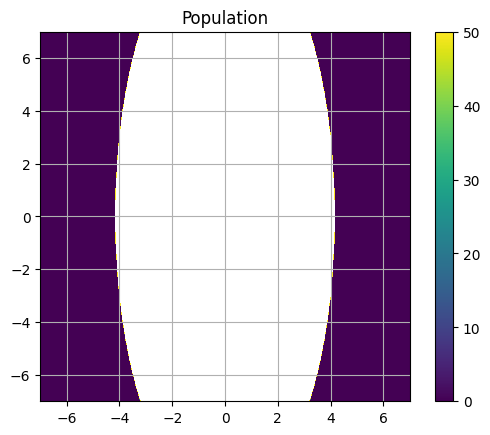

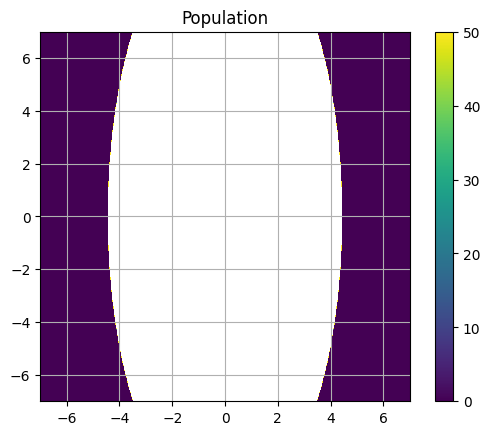

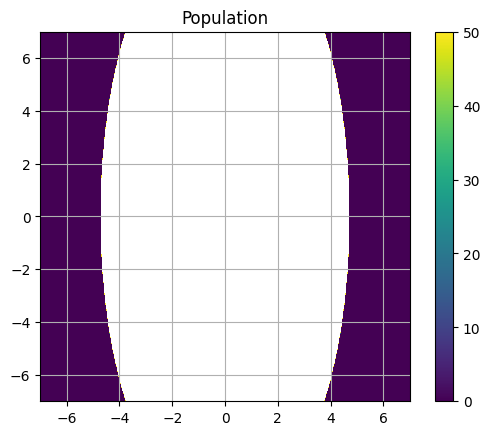

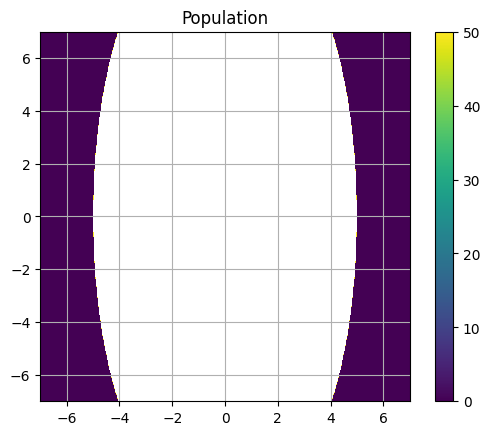

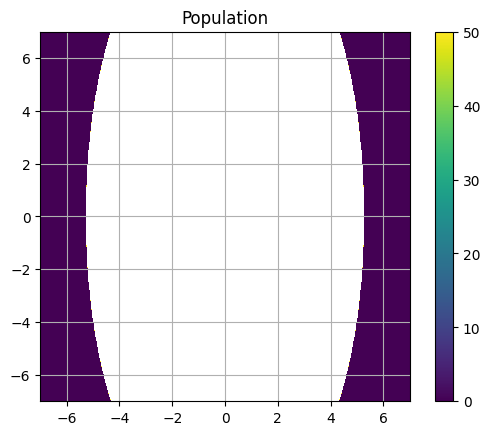

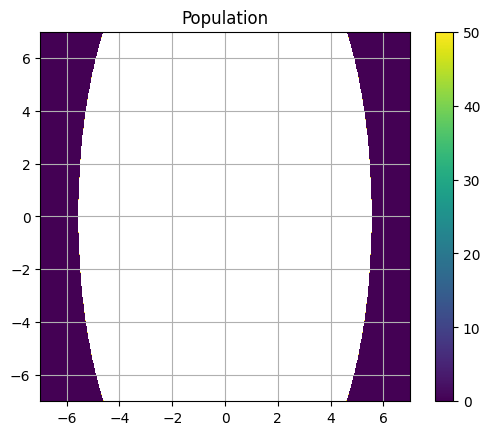

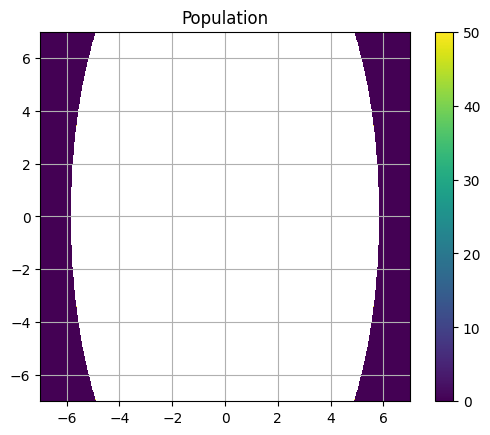

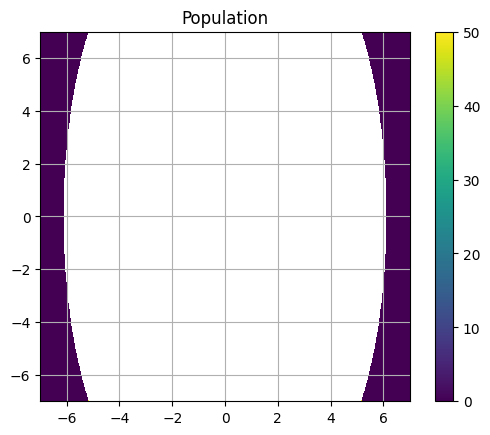

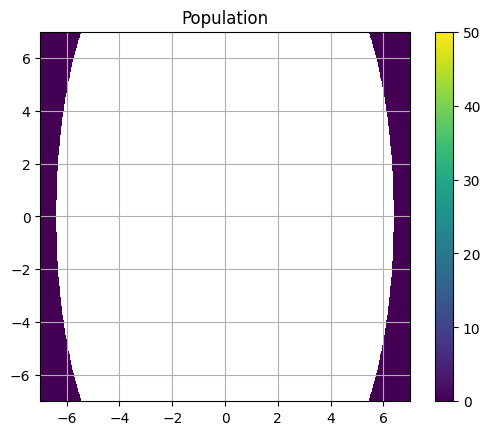

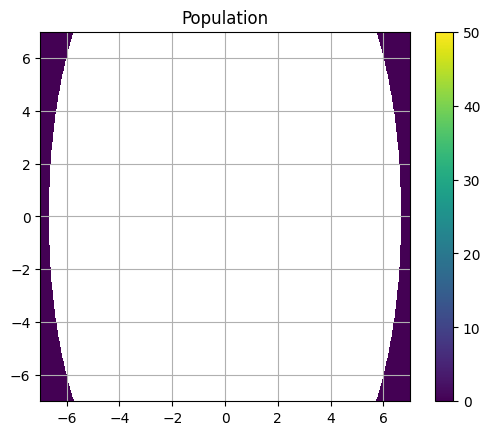

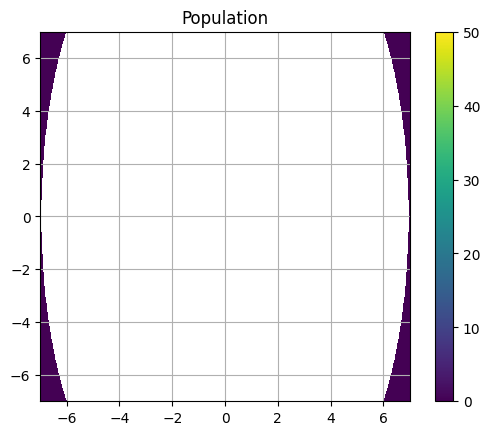

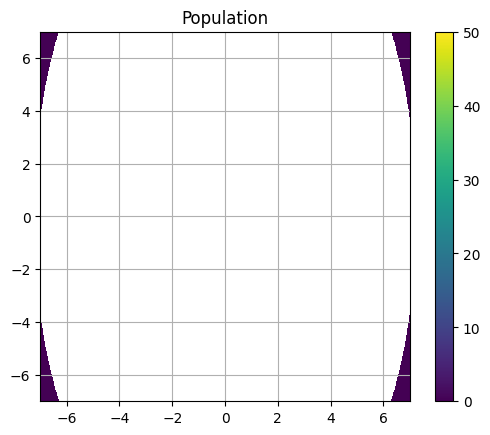

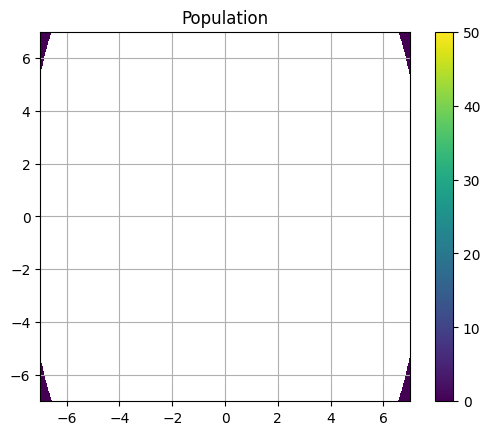

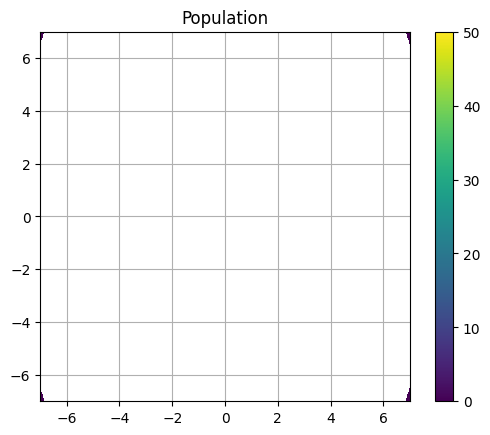

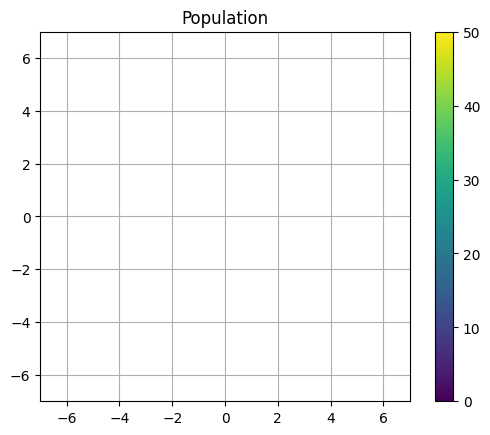

In [217]:
final = perform_step(steps=steps, k=1, alpha=2, mean2=1, sigma2=4, dx=dx, dy=dy, no_of_eggs=no_of_eggs, eggs_dist=eggs_dist)
    

In [215]:
(np.sum(final)*dx*dy - no_of_eggs)/no_of_eggs

nan